<a href="https://colab.research.google.com/github/Roozbeh-Bazargani/CPSC540-project/blob/main/baseline/ResNet_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Params

In [1]:
train_slides_vpc = [2, 5, 6, 7]
val_slides_vpc = [3]
test_slides_vpc = [1]

# Mount

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path_VPC = 'drive/MyDrive/CPSC540-project/VPC-10X/'

# Import

In [4]:
import os
import pandas as pd
# from PIL import Image
from skimage import io
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt

# Dataset

In [5]:
class VPCDataset(Dataset):
  def __init__(self, root_dir, slides, transform=None):
    self.root_dir = root_dir
    self.transform = transform

    # extracting image locations
    self.img_files = []
    for slide in slides:
      slide_path = root_dir + 'Slide00' + str(slide) + '/'
      self.img_files.extend(os.listdir(slide_path))
    
  def __len__(self):
    return len(self.img_files)

  def __getitem__(self, index):
    img_file = self.img_files[index]
    img_path = self.root_dir + 'S' + img_file[1:8] + '/' + img_file # hard coded!!!
    # img = Image.open(img_path)
    img = io.imread(img_path)
    y = torch.tensor(int(img_file[-5]))

    if self.transform:
      img = self.transform(img)
    return {'img': img, 'label': y}
    # return (img, y)

In [6]:
dataset = VPCDataset(path_VPC, val_slides_vpc, transform=transforms.ToTensor())

In [7]:
val_loader = DataLoader(dataset=dataset, batch_size=2, num_workers=0)

In [8]:
iterator = iter(val_loader)
batch = next(iterator)
# output = dataset.__getitem__(50)['img']
output = batch['img'][1]

In [9]:
torch.min(output)

tensor(0.)

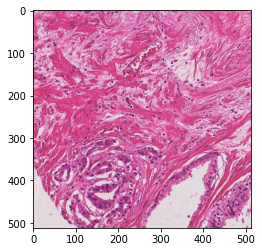

In [10]:
plt.imshow(output.permute(1, 2, 0))